In [135]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

In [136]:
import numpy as np
import pandas as pd

In [137]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [138]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect,table,column,func

In [139]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [140]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [141]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [142]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [143]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()
session = Session(bind=conn)

# Exploratory Climate Analysis

In [144]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [145]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [146]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [147]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [148]:
tbl_measurement=Base.classes.measurement
tbl_station=Base.classes.station
maxdate= session.query(func.max(tbl_measurement.date)).scalar()

v=str(maxdate)
v, space, time = v.partition(' ')
maxdate=dt.datetime.strptime(v, '%Y-%m-%d').date()
yearbackdate = maxdate + relativedelta(months=-12)
#print(maxdate)
#print(yearbackdate)


results = session.query(tbl_measurement.date , tbl_measurement.prcp ).\
          filter(tbl_measurement.date >= yearbackdate,tbl_measurement.prcp!=None)
sql="select date, prcp from measurement where date >=(?) and prcp is not Null"
print (sql)
measure_df= pd.read_sql_query(sql,conn,params=(yearbackdate,) )

measure_df.set_index('date',inplace=True)
measure_df=measure_df.sort_values(by=["date"])

measure_df.head(10)
#for row in results:
    #print("date :{0},prcp:{1}".format(row.date,row.prcp))

select date, prcp from measurement where date >=(?) and prcp is not Null


,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
2016-08-23,1.79
2016-08-24,1.22
2016-08-24,0.08
2016-08-24,2.15


In [149]:
#lstdate = [dt.datetime.strptime(result[0], '%y-%m-%d').date() for result in results[:10]]
#lstprecip = [(result[1]) for result in results[:10]]#lstdate = [result[0] for result in results[:10]]

lstdate=[]
for result in results:
    value_date= (dt.datetime.strptime(result[0], '%Y-%m-%d'))
    dtact=value_date.date()
    lstdate.append(dtact)
lstprcp = [result[1] for result in results]


In [150]:
#for record in results:
   # print(record[0])

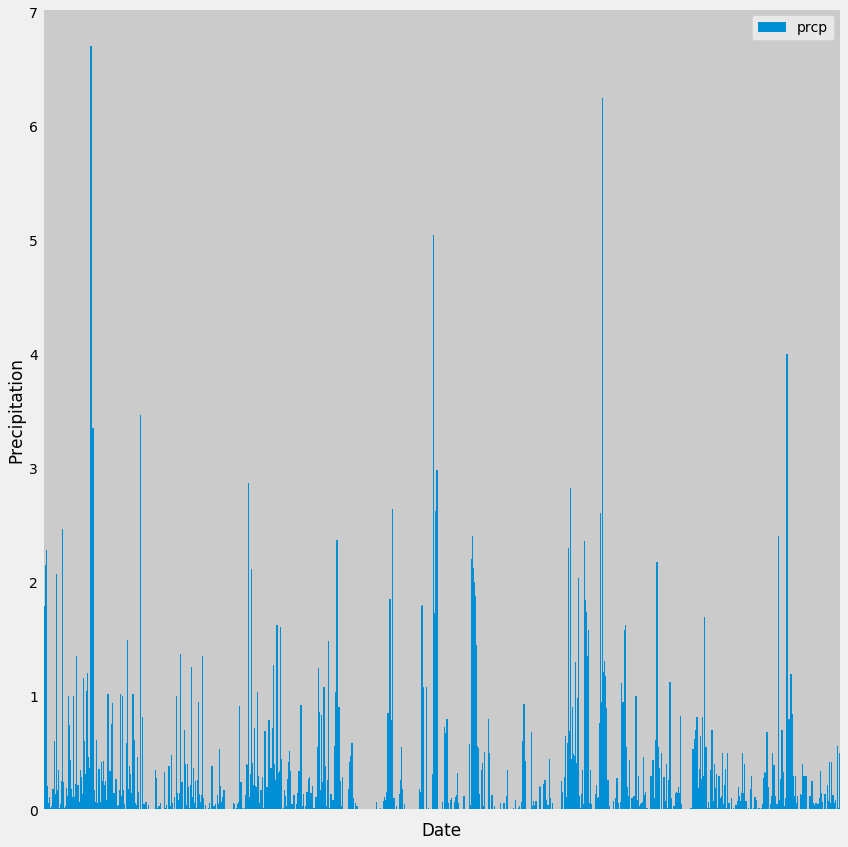

In [173]:
measure_df.plot(kind='bar',subplots=False,Width=3,figsize=(12,12),align="center")
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
ax1.set_xticklabels(' ') 
ax1.set_xlabel("Date")
ax1.set_ylabel("Precipitation")

plt.tight_layout()
plt.show()
plt.show()

In [152]:
#fig, ax = plt.subplots()
##xpos = range(1, len(scores)+1)
#ax = plt.subplot(111)
#ax.bar([dt_val for dt_val in measure_df["date"]] , [prpt for prpt in measure_df["prcp"]])
#ax.set_xlabel("Date")
#ax.set_ylabel("Precipitation")

#fig.tight_layout()
#plt.show()

In [153]:
#for dt in lstprcp:
 #   print(dt)
 
##c=dt.datetime.strptime('30-01-12', '%d-%m-%y').date()
#datetime.date(2012, 1, 30)
#print(c)

![precipitation](Images/precipitation.png)

In [154]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measure_desc=measure_df["prcp"].describe(include='Name')
new_m_df= pd.DataFrame(measure_desc)
new_m_df=new_m_df.rename(columns={"prcp":'precipitation'})
new_m_df.head(10)

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [155]:
# Design a query to show how many stations are available in this dataset?
stationcnt=session.query(Station.station).distinct().count()
print("Station Count : ",stationcnt)

Station Count :  9


In [156]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
mostactiveStation=session.query(Station,Measurement, (func.count(Station.station))).filter(Station.station==Measurement.station).group_by(Station.station).order_by(func.count(Station.station).desc()).all()

for row in mostactiveStation:
     print("Station Name : {}, Active Count : {} ".format(row[0].station,row[2]))
        


Station Name : USC00519281, Active Count : 2772 
Station Name : USC00519397, Active Count : 2724 
Station Name : USC00513117, Active Count : 2709 
Station Name : USC00519523, Active Count : 2669 
Station Name : USC00516128, Active Count : 2612 
Station Name : USC00514830, Active Count : 2202 
Station Name : USC00511918, Active Count : 1979 
Station Name : USC00517948, Active Count : 1372 
Station Name : USC00518838, Active Count : 511 


In [157]:
mostactiveStation=session.query(Station,Measurement, (func.count(Station.station))).filter(Station.station==Measurement.station).group_by(Station.station).order_by(func.count(Station.station).desc()).first()
print(" Most active Station Name : {}, Active Count : {} ".format(mostactiveStation[0].station,mostactiveStation[2]))

 Most active Station Name : USC00519281, Active Count : 2772 


In [193]:
tobsresults = session.query(tbl_measurement.date ,tbl_measurement.station, tbl_measurement.tobs ).\
          filter(tbl_measurement.date >= yearbackdate,tbl_measurement.tobs!=None)
for row in tobsresults:
    print(row)

('2016-08-23', 'USC00519397', 81.0)
('2016-08-24', 'USC00519397', 79.0)
('2016-08-25', 'USC00519397', 80.0)
('2016-08-26', 'USC00519397', 79.0)
('2016-08-27', 'USC00519397', 77.0)
('2016-08-28', 'USC00519397', 78.0)
('2016-08-29', 'USC00519397', 78.0)
('2016-08-30', 'USC00519397', 79.0)
('2016-08-31', 'USC00519397', 80.0)
('2016-09-01', 'USC00519397', 81.0)
('2016-09-02', 'USC00519397', 80.0)
('2016-09-03', 'USC00519397', 79.0)
('2016-09-04', 'USC00519397', 75.0)
('2016-09-05', 'USC00519397', 79.0)
('2016-09-06', 'USC00519397', 76.0)
('2016-09-07', 'USC00519397', 76.0)
('2016-09-08', 'USC00519397', 80.0)
('2016-09-09', 'USC00519397', 79.0)
('2016-09-10', 'USC00519397', 78.0)
('2016-09-11', 'USC00519397', 76.0)
('2016-09-12', 'USC00519397', 78.0)
('2016-09-13', 'USC00519397', 78.0)
('2016-09-14', 'USC00519397', 75.0)
('2016-09-15', 'USC00519397', 79.0)
('2016-09-16', 'USC00519397', 80.0)
('2016-09-17', 'USC00519397', 79.0)
('2016-09-18', 'USC00519397', 81.0)
('2016-09-19', 'USC00519397'

('2016-10-23', 'USC00516128', 72.0)
('2016-10-24', 'USC00516128', 71.0)
('2016-10-25', 'USC00516128', 74.0)
('2016-10-26', 'USC00516128', 75.0)
('2016-10-27', 'USC00516128', 71.0)
('2016-10-28', 'USC00516128', 68.0)
('2016-10-29', 'USC00516128', 71.0)
('2016-10-30', 'USC00516128', 76.0)
('2016-10-31', 'USC00516128', 69.0)
('2016-11-01', 'USC00516128', 73.0)
('2016-11-02', 'USC00516128', 76.0)
('2016-11-03', 'USC00516128', 74.0)
('2016-11-04', 'USC00516128', 74.0)
('2016-11-05', 'USC00516128', 69.0)
('2016-11-06', 'USC00516128', 77.0)
('2016-11-07', 'USC00516128', 71.0)
('2016-11-08', 'USC00516128', 71.0)
('2016-11-09', 'USC00516128', 71.0)
('2016-11-10', 'USC00516128', 71.0)
('2016-11-11', 'USC00516128', 67.0)
('2016-11-12', 'USC00516128', 73.0)
('2016-11-13', 'USC00516128', 72.0)
('2016-11-14', 'USC00516128', 74.0)
('2016-11-15', 'USC00516128', 72.0)
('2016-11-16', 'USC00516128', 72.0)
('2016-11-17', 'USC00516128', 75.0)
('2016-11-20', 'USC00516128', 74.0)
('2016-11-21', 'USC00516128'

In [160]:
# temperature obeservation data for 12 months

sql="select date,station, tobs from measurement where date >=(?) and tobs is not Null"
print (sql)
tobs_df= pd.read_sql_query(sql,conn,params=(yearbackdate,) )
tobs_df.head()

select date,station, tobs from measurement where date >=(?) and tobs is not Null


,date,station,tobs
0,2016-08-23,USC00519397,81.0
1,2016-08-24,USC00519397,79.0
2,2016-08-25,USC00519397,80.0
3,2016-08-26,USC00519397,79.0
4,2016-08-27,USC00519397,77.0


In [206]:
tobs_grp=tobs_df.groupby("station").count().sort_values("tobs",ascending=False)
tobs_grp.head(10)

#state_violence_df=region_vict_df.groupby(["Year","state"],as_index=False).agg({'incident_id':'count', 'casualty':'sum'})

,date,tobs
station,,
USC00519397,361,361
USC00519281,352,352
USC00516128,349,349
USC00513117,343,343
USC00519523,337,337
USC00514830,305,305
USC00517948,183,183


In [223]:
max_tobs_grp=tobs_grp.head(1)
max_tobs_grp=max_tobs_grp.reset_index()
station_id=max_tobs_grp.ix[0,0]
max_tobs_grp.head()
print(station_id)

USC00519397


C:\Users\arin_\AppData\Local\conda\conda\envs\Pythondata\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [224]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
tobs_obs_results=session.query(Measurement.station,(func.Max(Measurement.tobs)),(func.Min(Measurement.tobs)),(func.avg(Measurement.tobs))).\
                    filter(Measurement.station==station_id)
#
#print(" Most active Station Name : {}, Max temp : {}, Min temp : {}, Avg temp : {},  ".format(tobs_obs_results[0],tobs_obs_results[1],tobs_obs_results[2],tobs_obs_results[3]))
for row in tobs_obs_results:
    #print(row)
    print(" Most Active Station Name : {}, Max temp : {}, Min temp : {}, Avg temp : {},  ".\
          format(row[0],row[1],row[2],row[3]))

 Most Active Station Name : USC00519397, Max temp : 87.0, Min temp : 56.0, Avg temp : 74.55323054331865,  


In [279]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_df.head(10)
tobs_station_df= tobs_df.where(tobs_df["station"]==station_id)
del(tobs_station_df["date"])
del(tobs_station_df["station"])
####tobds_freq_grp=tobs_station_df.groupby(["tobs"],as_index=False).count()
####tobds_freq_grp=tobds_freq_grp.rename(columns={"station":"occurences"})
####tobds_freq_grp.head(100)





tobs_station_df.head()

,tobs
0,81.0
1,79.0
2,80.0
3,79.0
4,77.0


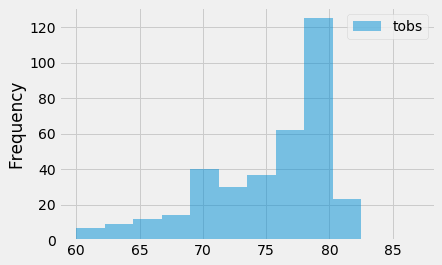

In [285]:

#tobds_freq_grp.plot.hist(bins=12)
tobs_station_df.plot.hist(bins=12, stacked=True, alpha=.5)

![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
